# Data Exploration

This Jupyter notebook provides a step-by-step guide to explore the data for project. The purpose of this notebook is to analyze and gain insights into the available data. This notebook explores various data exploration techniques, visualization libraries, and statistical analysis methods to understand the data distribution, relationships, trends, anomalies and etc.

By going through this notebook, we will be able to:

- Load and examine the raw data files
- Perform descriptive statistics and summary analysis
- Visualize the data using charts, plots, and graphs
- Discover patterns and anomalies within the data
- Generate insights and make informed decisions for project

### Install Dependencies

To install the dependencies for this project, run the following command to install the dependencies specified in the `requirements.txt` file: `pip install -r requirements.txt`

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

This section involves retrieving the data from a sqlite database and loading it into two Pandas DataFrames. This step is essential for further analysis and exploration of the data.

In [2]:
conn = sqlite3.connect('data/main.sqlite')
bicycle_sharing_df = pd.read_sql_query(f"SELECT * FROM bike_data", conn)
weather_data_df = pd.read_sql_query(f"SELECT * FROM weather", conn)
conn.close()

In [3]:
bicycle_sharing_df.head()


,timestamp,new bike shares,real temp,feel temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182.0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
weather_data_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### Data Exploration

This section focuses on exploring two sets of data further: [London bike sharing dataset](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset) and [London Weather Data](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data).

#### Exploration of the Bicycle sharing Data in London

In [5]:
bicycle_sharing_df.shape

(17414, 10)

In [6]:
bicycle_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        17414 non-null  object 
 1   new bike shares  17414 non-null  float64
 2   real temp        17414 non-null  float64
 3   feel temp        17414 non-null  float64
 4   hum              17414 non-null  float64
 5   wind_speed       17414 non-null  float64
 6   weather_code     17414 non-null  float64
 7   is_holiday       17414 non-null  float64
 8   is_weekend       17414 non-null  float64
 9   season           17414 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Now, let's examine the date range of the 'Bicycle sharing Data in London' to determine the available data period, starting from the minimum date and ending at the maximum date.

In [7]:
date_df = pd.to_datetime(bicycle_sharing_df['timestamp'], format='%Y-%m-%d %H:%M:%S')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Bicycle sharing Data in Londan: {min_date} to {max_date}"

'Date Range of the Bicycle sharing Data in Londan: January-2015 to January-2017'

In [8]:
bicycle_sharing_df.head(6)

,timestamp,new bike shares,real temp,feel temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182.0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46.0,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0


In [9]:
bicycle_sharing_df.tail(6)

,timestamp,new bike shares,real temp,feel temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17408,2017-01-03 18:00:00,2220.0,5.0,1.0,81.0,22.0,2.0,0.0,0.0,3.0
17409,2017-01-03 19:00:00,1042.0,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541.0,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337.0,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224.0,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139.0,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


By examining the head and tail of the Bicycle sharing Data in London, we can observe that initially not all counting stations recorded bicycle sharing counts. Hence, we can verify the number of counting stations based on the date.

In [10]:
counting_stations_df = pd.DataFrame({'timestamp': bicycle_sharing_df['timestamp']})
counting_stations_df['Counting Stations'] = (bicycle_sharing_df.iloc[:, 1:] != 0).sum(axis=1)
counting_stations_df

,timestamp,Counting Stations
0,2015-01-04 00:00:00,8
1,2015-01-04 01:00:00,8
2,2015-01-04 02:00:00,7
3,2015-01-04 03:00:00,7
4,2015-01-04 04:00:00,7
...,...,...
17409,2017-01-03 19:00:00,7
17410,2017-01-03 20:00:00,7
17411,2017-01-03 21:00:00,7
17412,2017-01-03 22:00:00,7


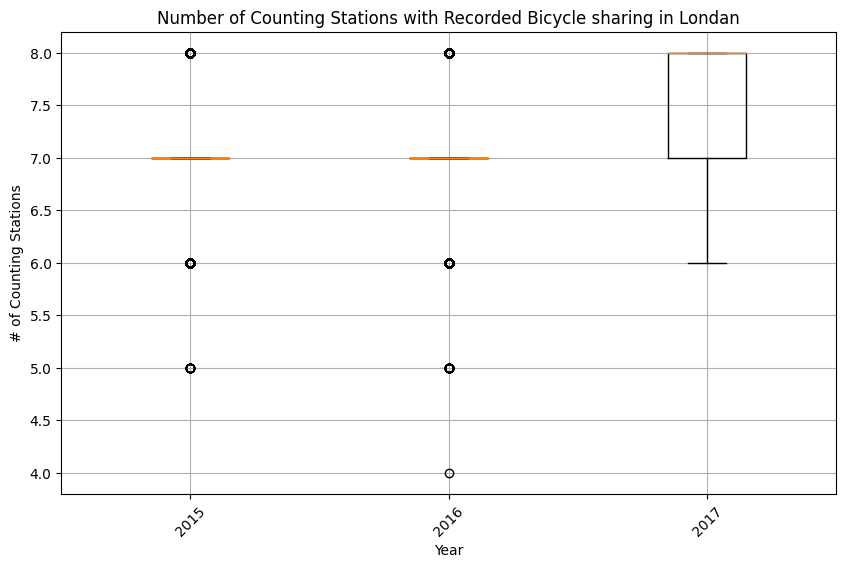

In [11]:
# Extract the year from the date column
counting_stations_df['Year'] = counting_stations_df['timestamp'].str.split('-').str[0]

# Group the data by year
grouped_data = counting_stations_df.groupby('Year')['Counting Stations'].apply(list)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(grouped_data.values)

# Customize the plot
plt.title('Number of Counting Stations with Recorded Bicycle sharing in Londan')
plt.xlabel('Year')
plt.ylabel('# of Counting Stations')
plt.grid(True)

# Set the x-axis labels to show only the year
plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index, rotation=45)

# Show the plot
plt.show()

#### Exploration of the Weather and Climate Data of London



In [12]:
weather_data_df.shape

(15341, 10)

In [13]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [14]:
date_df = pd.to_datetime(weather_data_df['date'], format='%Y%m%d')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Weather and Climate Data of London: {min_date} to {max_date}"

'Date Range of the Weather and Climate Data of London: January-1979 to December-2020'

Keeping the records from January 2015 to January 2017

In [15]:
# Convert the 'date' column to datetime format
weather_data_df['date'] = pd.to_datetime(weather_data_df['date'], format='%Y%m%d')

# Define the start and end dates for the desired range
start_date = pd.to_datetime('January-2015', format='%B-%Y')
end_date = pd.to_datetime('January-2017', format='%B-%Y')

# Create a boolean mask to filter the data
mask = (weather_data_df['date'] >= start_date) & (weather_data_df['date'] <= end_date)

# Apply the mask to filter the data
filtered_weather_data_df = weather_data_df[mask]

# Find the minimum and maximum dates in the filtered DataFrame
min_filtered_date = filtered_weather_data_df['date'].min()
max_filtered_date = filtered_weather_data_df['date'].max()

# Format the dates as needed
min_filtered_date_str = min_filtered_date.strftime('%B-%Y')
max_filtered_date_str = max_filtered_date.strftime('%B-%Y')

# Print the results
print(f"Minimum Date in Filtered Weather Data: {min_filtered_date_str}")
print(f"Maximum Date in Filtered Weather Data: {max_filtered_date_str}")


Minimum Date in Filtered Weather Data: January-2015
Maximum Date in Filtered Weather Data: January-2017


Now, examining the 'Weather and Climate Data of London', it is apparent that the dataset contains a number of `null` values. Visualizing these `null` values allows us to assess their severity and identify columns that should be excluded from our reports.

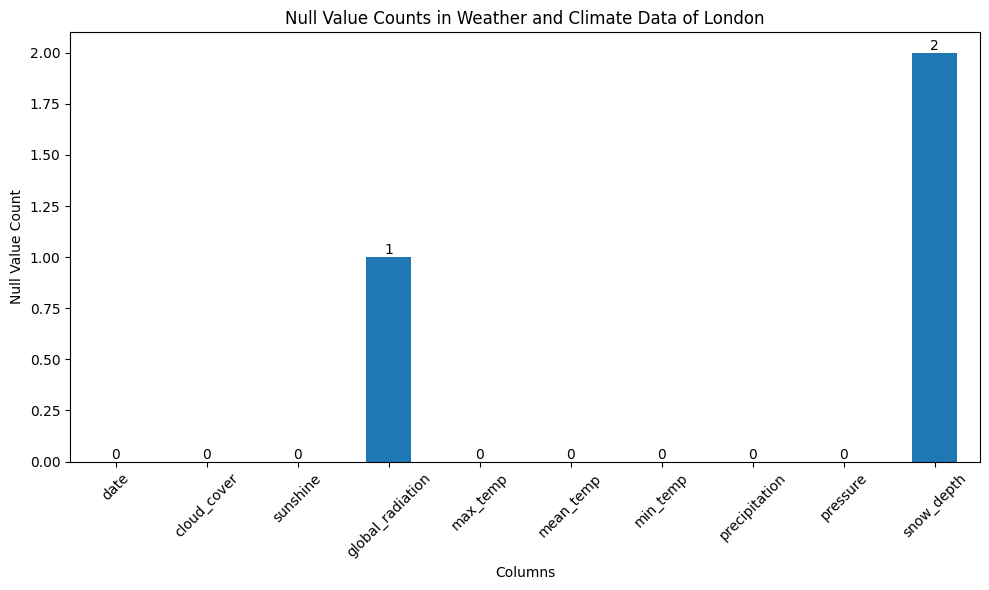

In [16]:
# Count the number of null values in each column
null_counts = filtered_weather_data_df.isnull().sum()

# Create a bar plot of null value counts
plt.figure(figsize=(10, 6))
ax = null_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts in Weather and Climate Data of London')
plt.xticks(rotation=45)

# Add text annotations for null count above each bar
for i, count in enumerate(null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()